<a href="https://colab.research.google.com/github/skywalker00001/Machine_Learning_Study/blob/main/GD_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unary function

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from mpl_toolkits.mplot3d import Axes3D


In [7]:
def f1(x):
    return 0.5 * (x - 0.25) ** 2

X = np.arange(-4, 4, 0.05)
#x = np.linspace(-4 , 4, num=160)
Y = np.array(list(map(lambda t: f1(t), X)))

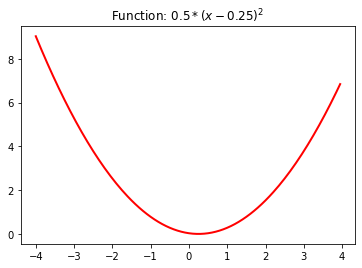

In [8]:
plt.figure(facecolor='w')
plt.plot(X, Y, 'r-', linewidth=2)
plt.title(u'Function: $0.5 * (x - 0.25) ^ 2$')
plt.show()

## Gradient Descent(GD) on unary function

In [9]:
"""
How does GD find the minimum of a function?
    1. find a random point x0 as the inital point, also set a learning rate
    2. get the derivative, and update x: x = x - learning_rate * derivative(x)
    3. repeart step 2 and stop iteration when f(x) convergent to a certain value
"""

# Derivative
def d1(x):
    return 0.5 * 2 * (x - 0.25)

x = 4 # initial x0
lr = 0.5
f_change = f1(x)
iter_num = 0
GD_X = [x]
GD_Y = [f1(x)]
y_limit = 1e-10

Text(0.5, 1.0, 'Function $y = 1/2 * (x - 1/4) ^ 2$ \n Learning rate: 0.500, Final X&Y: 0.25001, 0.00000, Iteration number: 19')

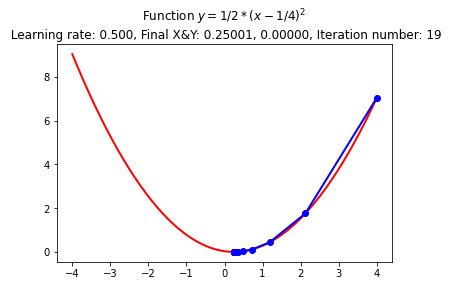

In [10]:
# start interation
while (f_change > y_limit and iter_num < 100):
    tmp = x - lr * d1(x)
    f_change = np.abs(f1(x) - f1(tmp))
    x = tmp
    GD_X.append(x)
    GD_Y.append(f1(x))
    iter_num += 1

'''
print('Final result is: {:.5f}, {:.5f}'.format(x, f1(x)))
print('Iteration num: {:d}'.format(iter_num))
print(GD_X)
'''


plt.figure(facecolor='w')
plt.plot(X, Y, 'r-', linewidth=2)
plt.plot(GD_X, GD_Y, 'bo-', linewidth=2)
plt.title(f'Function $y = 1/2 * (x - 1/4) ^ 2$ \n Learning rate: {lr:.3f}, Final X&Y: {x:.5f}, {f1(x):.5f}, Iteration number: {iter_num:d}')

# Binary function

In [11]:
def f2(x1, x2):
    return 0.5 * (x1 + x2) ** 2 - x1 * x2

x1 = np.arange(-4, 4, 0.2)
x2 = np.arange(-4, 4, 0.2)
X1, X2 = np.meshgrid(x1, x2)   # Generate  Xv, Yv, transforming x1, x2 to a matrix of n * m dimension.

Y = np.array(list(map(lambda t: f2(t[0], t[1]), zip(X1.flatten(), X2.flatten())))) # .flatten() shape a matrix to vector
Y.shape = X1.shape # reshape Y to a matrix (n * m)

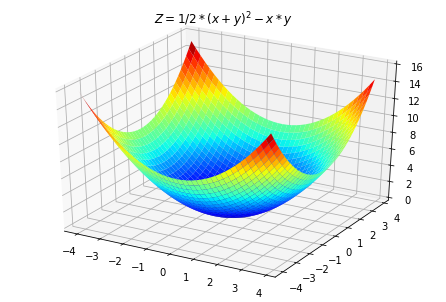

In [12]:
fig = plt.figure(facecolor='w')
ax = Axes3D(fig)
ax.plot_surface(X1, X2, Y, rstride=1, cstride=1, cmap=plt.cm.jet)
ax.set_title(f'$Z = 1/2 * (x + y) ^ 2 - x * y$')
plt.show()

## Gradient Descent(GD) on binary function

In [13]:
def f2(x, y):
    return 0.5 * (x + y) ** 2 - (x * y)

def h2_x(x, y): # patial derivative
    return x

def h2_y(x, y):
    return y

x = 4
y = 4
lr = 0.5
f_change = f2(x, y)
iter_num = 0
GD_X = [x]
GD_Y = [y]
GD_Z = [f2(x, y)]
z_limit = 1e-10

In [14]:
while (f_change > z_limit and iter_num < 100):
    tmp_x = x - lr * h2_x(x, y)
    tmp_y = y - lr * h2_y(x, y) 
    tmp_z = f2(tmp_x, tmp_y)

    f_change = np.abs (f2(x, y) - tmp_z)
    x, y = tmp_x, tmp_y
    GD_X.append(x)
    GD_Y.append(y)
    GD_Z.append(tmp_z)
    iter_num += 1

In [ ]:
GD_X

In [ ]:
GD_Z

In [15]:
x1 = np.arange(-4, 4, 0.2)
y1 = np.arange(-4, 4, 0.2)
X1, Y1 = np.meshgrid(x1, y1)

Z = np.array(list(map(lambda t: f2(t[0], t[1]), zip(X1.flatten(), Y1.flatten()))))
Z.shape = X1.shape

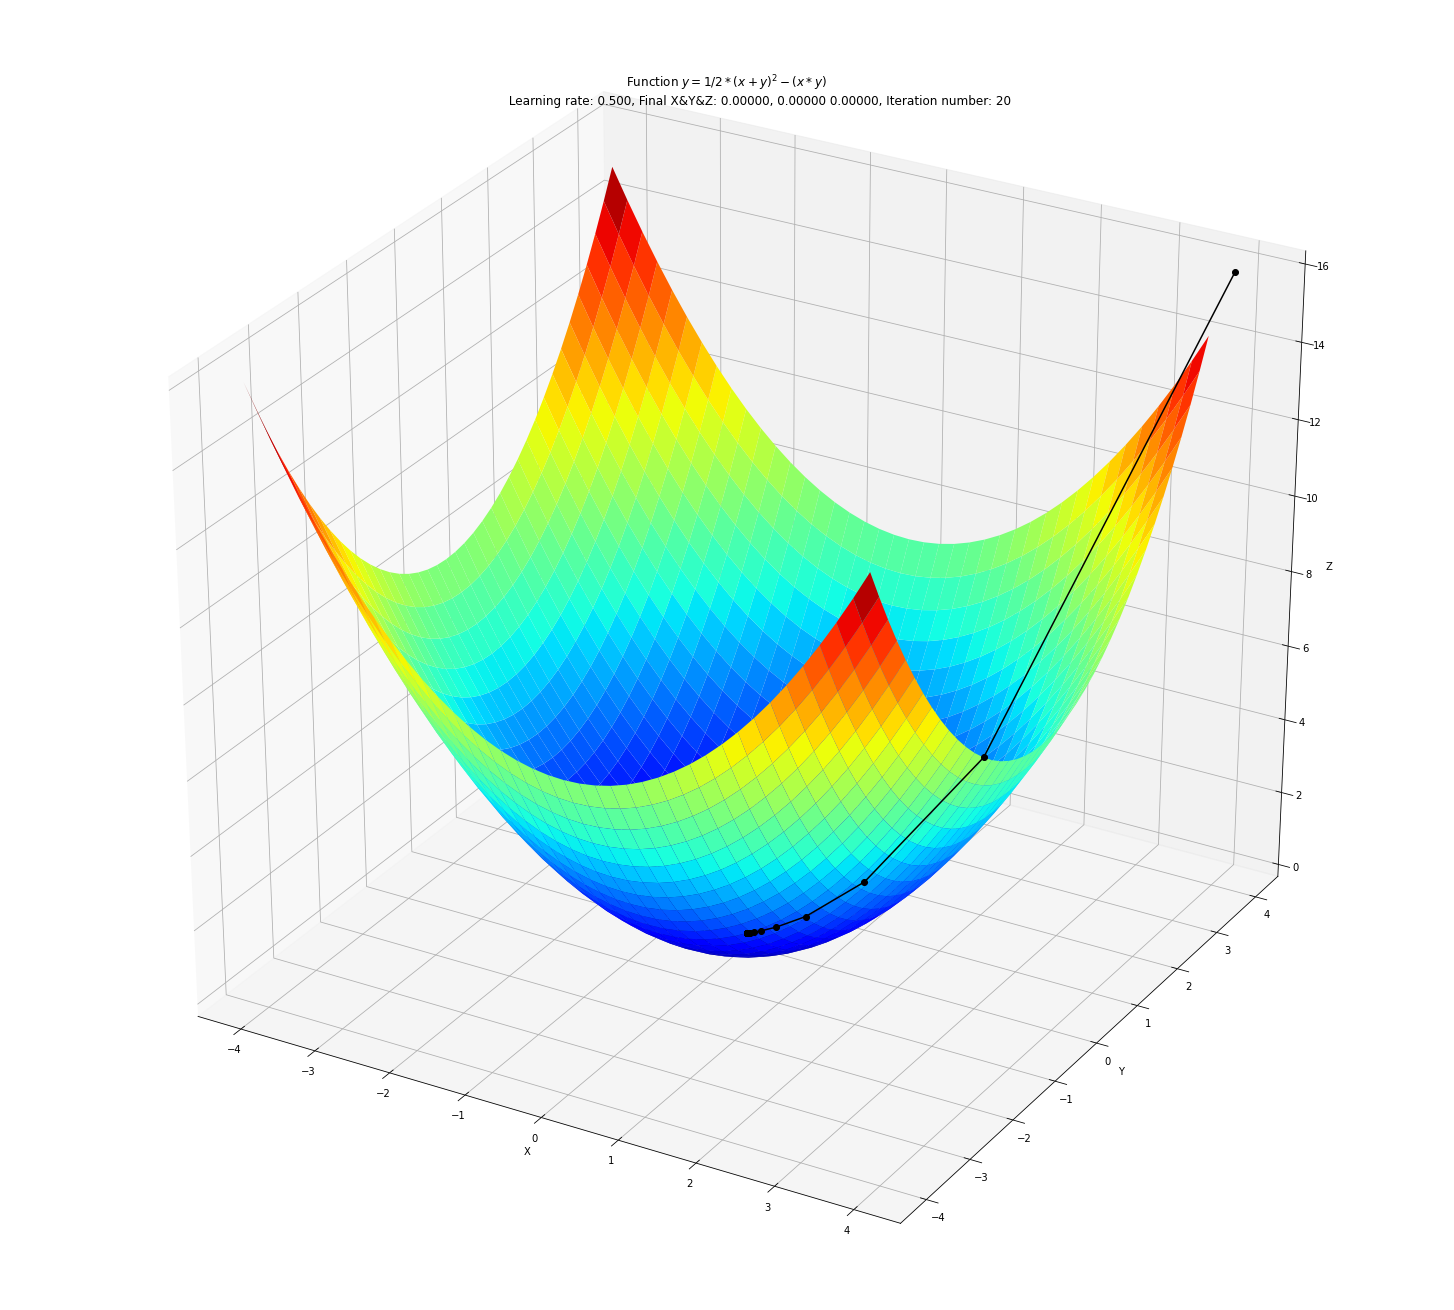

In [21]:
fig = plt.figure(facecolor='w', figsize = (20, 18))
ax = Axes3D(fig)

ax.plot(GD_X, GD_Y, GD_Z, 'ko-',zorder=5)
ax.plot_surface(X1, Y1, Z, rstride=1, cstride=1, cmap=plt.cm.jet,zorder=0)
#ax.plot(GD_X, GD_Y, GD_Z, 'ko-')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title(f'Function $y = 1/2 * (x + y) ^ 2 - (x * y)$ \n \
                Learning rate: {lr:.3f}, Final X&Y&Z: {x:.5f}, {y:.5f} {f2(x, y):.5f}, Iteration number: {iter_num:d}')
plt.show()

https://zhuanlan.zhihu.com/p/118020086?utm_source=wechat_session